In [1]:
from ultralytics import ASSETS, SAM, YOLO, FastSAM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
# Load a model
# model = SAM("sam2.1_t.pt")
# model = SAM("sam2.1_b.pt")
model = FastSAM("FastSAM-s.pt")


In [4]:
model.info()
model(ASSETS)

YOLOv8s-seg summary: 261 layers, 11,790,483 parameters, 0 gradients, 42.7 GFLOPs

image 1/2 /home/nick/anaconda3/envs/nnunet/lib/python3.12/site-packages/ultralytics/assets/bus.jpg: 640x480 94 objects, 80.9ms
image 2/2 /home/nick/anaconda3/envs/nnunet/lib/python3.12/site-packages/ultralytics/assets/zidane.jpg: 384x640 21 objects, 46.1ms
Speed: 1.4ms preprocess, 63.5ms inference, 119.1ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'object'}
 obb: None
 orig_img: array([[[119, 146, 172],
         [121, 148, 174],
         [122, 152, 177],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[120, 147, 173],
         [122, 149, 175],
         [123, 153, 178],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[123, 150, 176],
         [124, 151, 177],
         [125, 155, 180],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        ...,
 
        [[183, 182, 186],
         [179, 178, 182],
         [180, 179, 183],
         ...,
         [121, 111, 117],
         [113, 103, 109],
         [115, 105, 111]],
 
        [[165, 164, 168],
         [173, 172, 176],
         [187, 186, 190

In [64]:
# Run inference with bboxes prompt
# results = model("./foot_size_estm/IMG_7350.jpg", bboxes=[100, 100, 200, 200])

# # Run inference with single point
# results = model(points=[900, 370], labels=[1])

# # Run inference with multiple points
# results = model(points=[[400, 370], [900, 370]], labels=[1, 1])

# # Run inference with multiple points prompt per object
# results = model("./foot_size_estm/IMG_7350.jpg", points=[[[1683, 1430], [178, 1906], [2755, 1989]]], labels=[[2, 1, 1]])
results = model("./foot_size_estm/IMG_7350.jpg", points=[[1683, 1530]], labels=[[1]], imgsz=1024)
# results = model("./foot_size_estm/IMG_7350.jpg", points=[[[178, 1906], [2755, 1989]]], labels=[[1, 1]])

# # Run inference with negative points prompt
# results = model(points=[[[400, 370], [900, 370]]], labels=[[1, 0]])


image 1/1 /home/nick/Projects/foot_size_estm/foot_size_estm/IMG_7350.jpg: 2048x1536 1 object, 36.4ms
Speed: 24.4ms preprocess, 36.4ms inference, 7.8ms postprocess per image at shape (1, 3, 2048, 1536)


In [65]:
results[0].masks.data.shape

torch.Size([1, 2048, 1536])

In [66]:
# results = model("./foot_size_estm/IMG_7350.jpg")

In [67]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'object'}
 obb: None
 orig_img: array([[[ 60,  76,  93],
         [ 59,  75,  92],
         [ 61,  77,  94],
         ...,
         [ 59,  76,  89],
         [ 63,  80,  93],
         [ 63,  80,  93]],
 
        [[ 56,  72,  89],
         [ 55,  71,  88],
         [ 58,  74,  91],
         ...,
         [ 61,  78,  91],
         [ 63,  80,  93],
         [ 63,  80,  93]],
 
        [[ 55,  71,  88],
         [ 54,  70,  87],
         [ 57,  73,  90],
         ...,
         [ 59,  76,  89],
         [ 63,  80,  93],
         [ 67,  84,  97]],
 
        ...,
 
        [[179, 190, 194],
         [180, 191, 195],
         [182, 193, 197],
         ...,
         [ 97, 112, 121],
         [ 96, 111, 120],
         [100, 115, 124]],
 
        [[181, 192, 196],
         [185, 196, 200],
         [187, 198, 202

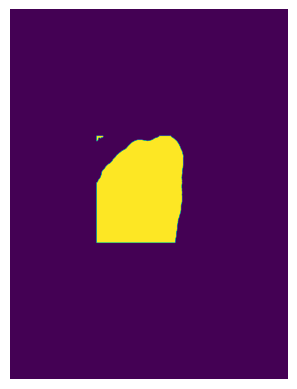

In [68]:
# Get the original image as a numpy array
img = np.array(results[0].orig_img)

# Get the segmentation masks
masks = results[0].masks.data

masks = masks.cpu().numpy() 

# masks= masks[0]

# plt.imshow(masks)

# Plot the image and overlay the masks
# plt.imshow(img)

# num_masks = masks.shape[0]
# colors = np.random.rand(num_masks, 3)  # RGB values between 0-1

# for i, mask in enumerate(masks):
#     colored_mask = np.zeros_like(img, dtype=np.float32)
#     for c in range(3):  # Apply same mask to R,G,B with chosen color
#         colored_mask[:, :, c] = mask * colors[i, c]

#     plt.imshow(colored_mask)  # Adjust alpha for transparency

idx = 0
for mask in masks[idx : idx + 1]:
    # plt.imshow(mask, alpha=0.5)  # Adjust alpha for mask transparency
    plt.imshow(mask) 
plt.axis('off')  # Hide the axes
plt.show()
# plt.imsave("seg.png")

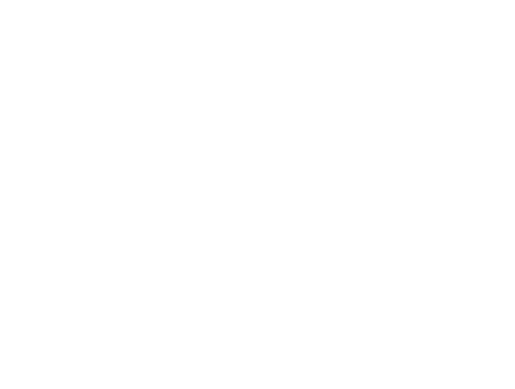

In [69]:
idx = 2
for mask in masks[idx : idx + 1]:
    # plt.imshow(mask, alpha=0.5)  # Adjust alpha for mask transparency
    plt.imshow(mask) 
plt.axis('off')  # Hide the axes
plt.show()

In [70]:
masks = results[0].masks.data

In [71]:
masks= np.array(masks[0])

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [72]:
masks.shape

torch.Size([1, 2048, 1536])

In [73]:
results[0].show()

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [74]:
results_2 = model("./foot_size_estm/IMG_7350.jpg", img, imgsz=1024)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(16, 640, 480)


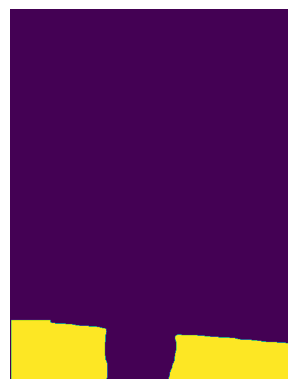

In [75]:
# Get the original image as a numpy array
img_2 = np.array(results_2[0].orig_img)

# Get the segmentation masks
masks_2 = results_2[0].masks.data

masks_2 = masks_2.cpu().numpy() 

print(masks_2.shape)

# masks= masks[0]

# plt.imshow(masks)

# Plot the image and overlay the masks
# plt.imshow(img)

# num_masks = masks.shape[0]
# colors = np.random.rand(num_masks, 3)  # RGB values between 0-1

# for i, mask in enumerate(masks):
#     colored_mask = np.zeros_like(img, dtype=np.float32)
#     for c in range(3):  # Apply same mask to R,G,B with chosen color
#         colored_mask[:, :, c] = mask * colors[i, c]

#     plt.imshow(colored_mask)  # Adjust alpha for transparency

idx = 2
for mask in masks_2[idx : idx + 1]:
    # plt.imshow(mask, alpha=0.5)  # Adjust alpha for mask transparency
    plt.imshow(mask) 
plt.axis('off')  # Hide the axes
plt.show()
# plt.imsave("seg.png")

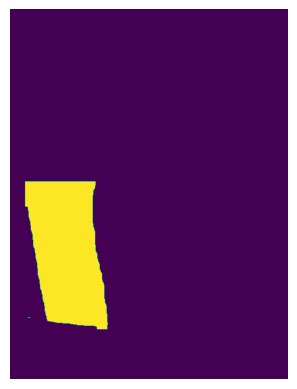

In [76]:
idx = 6
for mask in masks_2[idx : idx + 1]:
    # plt.imshow(mask, alpha=0.5)  # Adjust alpha for mask transparency
    plt.imshow(mask) 
plt.axis('off')  # Hide the axes
plt.show()

In [86]:
import cv2

def maks_opening(mask_init, it_num):
    """Applies morphological operation opening(erosion->dilation)"""

    # mask is your binary array (0/1 or 0/255)
    mask = mask_init.astype(np.uint8) * 255  # OpenCV prefers 0/255

    # Create a structuring element (3x3 square kernel here)
    kern_size = 1 + it_num * 2
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kern_size, kern_size))

    # Opening = erosion followed by dilation (removes small blobs)
    mask_opened = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # # Closing = dilation followed by erosion (fills small holes)
    # mask_clean = cv2.morphologyEx(mask_opened, cv2.MORPH_CLOSE, kernel)

    # Convert back to 0/1
    mask_opened = (mask_opened > 0).astype(np.uint8)

    return mask_opened

In [87]:
# paper_mask = masks_2[2]
# foot_mask = masks_2[3]

img_path = "./foot_size_estm/IMG_7350.jpg"

results_foot = model(img_path, points=[[1683, 1530]], labels=[[1]], imgsz=1024)
results_paper_1 = model(img_path, points=[[178, 1906]],
                      labels=[[1]], imgsz=1024)
results_paper = model(img_path, points=[[2755, 1989]],
                      labels=[[1]], imgsz=1024)

# results_paper[results_paper_1] = True

# results_paper = model(img_path, points=[[178, 1906], [2755, 1989]],
#                         labels=[[1, 1]], imgsz=1024)
# print(type(results))

# should be picked by some reference points (e.g. colour for paper or
# position for feet)
img_orig = np.array(results_paper[0].orig_img)
masks = results_paper[0].masks.data
masks = masks.cpu().numpy()
paper_mask = masks[0]

masks_1 = results_paper_1[0].masks.data
masks_1 = masks_1.cpu().numpy()
paper_mask_1 = masks_1[0]

print(paper_mask.shape)
print(paper_mask_1.shape)
print(np.unique(paper_mask_1))

paper_mask[paper_mask_1==1] = 1

masks = results_foot[0].masks.data
masks = masks.cpu().numpy()
foot_mask = masks[0]

foot_mask = maks_opening(foot_mask, it_num=3)
paper_mask = maks_opening(paper_mask, it_num=3)


image 1/1 /home/nick/Projects/foot_size_estm/foot_size_estm/IMG_7350.jpg: 1024x768 2 objects, 7.8ms
Speed: 11.1ms preprocess, 7.8ms inference, 6.8ms postprocess per image at shape (1, 3, 1024, 768)

image 1/1 /home/nick/Projects/foot_size_estm/foot_size_estm/IMG_7350.jpg: 1024x768 2 objects, 7.5ms
Speed: 4.0ms preprocess, 7.5ms inference, 6.7ms postprocess per image at shape (1, 3, 1024, 768)

image 1/1 /home/nick/Projects/foot_size_estm/foot_size_estm/IMG_7350.jpg: 1024x768 3 objects, 7.5ms
Speed: 4.0ms preprocess, 7.5ms inference, 6.7ms postprocess per image at shape (1, 3, 1024, 768)
(1024, 768)
(1024, 768)
[          0           1]


In [88]:
np.unique(paper_mask)

array([0, 1], dtype=uint8)

In [89]:
paper_mask.shape

(1024, 768)

In [90]:
top_left_p = [-1, -1]
top_right_p = [-1, -1]
bottom_left_p = [-1, -1]
bottom_right_p = [-1, -1]

heigh, width = paper_mask.shape

for yy in range(heigh):
    for xx in range(width):
        if not paper_mask[yy, xx]:
            continue

        if top_left_p[0] == -1:
            top_left_p[0] = xx
            top_left_p[1] = yy

            top_right_p[0] = xx
            top_right_p[1] = yy

            bottom_left_p[0] = xx
            bottom_left_p[1] = yy

            bottom_right_p[0] = xx
            bottom_right_p[1] = yy

        if xx + yy < top_left_p[0] + top_left_p[1]:
            top_left_p[0] = xx
            top_left_p[1] = yy

        if xx + (heigh - yy) > top_right_p[0] + (heigh - top_right_p[1]):
            top_right_p[0] = xx
            top_right_p[1] = yy

        if width - xx + yy > (width - bottom_left_p[0]) + bottom_left_p[1]:
            bottom_left_p[0] = xx
            bottom_left_p[1] = yy

        if xx + yy > bottom_right_p[0] + bottom_right_p[1]:
            bottom_right_p[0] = xx
            bottom_right_p[1] = yy

In [91]:
# top_left_p = [top_left_p[1], top_left_p[0]]
# top_right_p = [top_right_p[1], top_right_p[0]]
# bottom_left_p = [bottom_left_p[1], bottom_left_p[0]]
# bottom_right_p = [bottom_right_p[1], bottom_right_p[0]]

In [92]:
points = np.array([top_left_p, top_right_p, bottom_right_p, bottom_left_p])

# paper_ref_1 = [top_left_p[0] + 30, top_left_p[1] + 30]
# paper_ref_2 = [top_right_p[0] - 30, top_right_p[1] + 30]
# points = np.array([paper_ref_1, paper_ref_2, bottom_right_p, bottom_left_p])
# points = np.array([top_left_p, top_right_p])

In [93]:
# print(paper_ref_1)
# print(paper_ref_2)

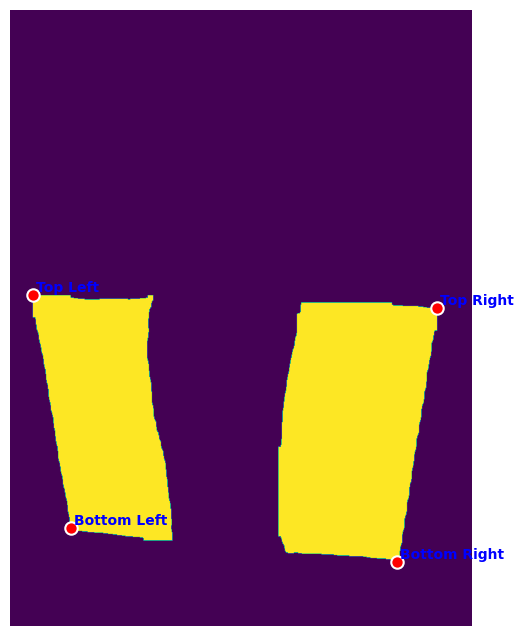

In [94]:
# Show image
plt.figure(figsize=(8, 8))
plt.imshow(paper_mask)

# Plot circular markers
plt.scatter(points[:, 0], points[:, 1], 
            c="red", s=80, marker="o", edgecolors="white", linewidths=1.5)

# (Optional) Label each point
labels = ["Top Left", "Top Right", "Bottom Right", "Bottom Left"]
for (x, y), label in zip(points, labels):
    plt.text(x+5, y-5, label, color="blue", fontsize=10, weight="bold")

plt.axis("off")
plt.show()

In [95]:
toe_p = [-1, -1]
fleft_p = [-1, -1]
fright_p = [-1, -1]

heigh, width = foot_mask.shape

for yy in range(heigh):
    for xx in range(width):
        if not foot_mask[yy, xx]:
            continue

        if toe_p[0] == -1:
            toe_p[0] = xx
            toe_p[1] = yy

            fleft_p[0] = xx
            fleft_p[1] = yy

            fright_p[0] = xx
            fright_p[1] = yy

        if yy < toe_p[1]:
            toe_p[0] = xx
            toe_p[1] = yy

        if xx > fright_p[0]:
            fright_p[0] = xx
            fright_p[1] = yy

        if xx < fleft_p[0]:
            fleft_p[0] = xx
            fleft_p[1] = yy

In [96]:
points_f = np.array([toe_p, fright_p, fleft_p])

In [97]:
# points_f

In [98]:
# f_ref_p = [toe_p[0], toe_p[1] + 50]

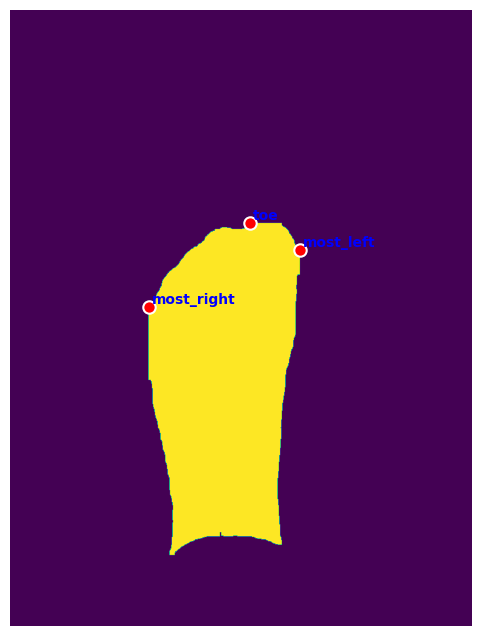

In [99]:
# Show image
plt.figure(figsize=(8, 8))
plt.imshow(foot_mask)

# Plot circular markers
plt.scatter(points_f[:, 0], points_f[:, 1], 
            c="red", s=80, marker="o", edgecolors="white", linewidths=1.5)

# (Optional) Label each point
labels = ["toe", "most_left", "most_right"]
for (x, y), label in zip(points_f, labels):
    plt.text(x+5, y-5, label, color="blue", fontsize=10, weight="bold")

plt.axis("off")
plt.show()

In [17]:
import cv2

In [18]:
import numpy as np
import cv2

def project_points_to_top_edge(
    corners_img,  # [TL, TR, BR, BL] in image pixels, shape (4,2)
    pts_img,      # points to project, shape (N,2)
    size_mm=(215.9, 279.4),  # Letter by default (W,H) in mm; use (210,297) for A4
    camera_matrix=None,      # 3x3 if you have calibration
    dist_coeffs=None         # (k1,k2,p1,p2, ...), if you have calibration
):
    corners_img = np.asarray(corners_img, dtype=np.float32)
    pts_img = np.asarray(pts_img, dtype=np.float32)

    # 0) Optional: undistort the image points and the 4 corners
    if camera_matrix is not None and dist_coeffs is not None:
        def undistort(pts):
            return cv2.undistortPoints(
                pts.reshape(-1,1,2), camera_matrix, dist_coeffs, P=camera_matrix
            ).reshape(-1,2).astype(np.float32)

        corners_img = undistort(corners_img)
        pts_img = undistort(pts_img)

    # 1) Build homography from image->paper coordinates
    W, H = size_mm
    dst_paper = np.array([[0,0],[W,0],[W,H],[0,H]], dtype=np.float32)  # TL,TR,BR,BL
    H_img2paper = cv2.getPerspectiveTransform(corners_img, dst_paper)
    H_paper2img = np.linalg.inv(H_img2paper)

    # 2) Map points into the paper plane
    pts_paper = cv2.perspectiveTransform(pts_img.reshape(-1,1,2), H_img2paper).reshape(-1,2)

    # 3) Orthogonal projection onto the top edge y=0, clamped to the segment [x=0..W]
    x = np.clip(pts_paper[:,0], 0, W)
    projs_paper = np.column_stack([x, np.zeros_like(x)]).astype(np.float32)

    # Distances to the top edge in *millimeters* on the paper (signed by convention)
    dist_to_top_mm = pts_paper[:,1].copy()  # use np.abs(...) if you want always-positive

    # 4) Map the projected points back to the original image
    projs_img = cv2.perspectiveTransform(projs_paper.reshape(-1,1,2), H_paper2img).reshape(-1,2)

    return projs_img, projs_paper, dist_to_top_mm


In [19]:
def pick_size_mm_for_top_edge(corners_img, base_size_mm=(215.9, 279.4)):
    """
    corners_img: [TL, TR, BR, BL] in pixels.
    base_size_mm: (short, long) side, e.g. (215.9, 279.4) for Letter,
                  (210, 297) for A4.
    Returns (W, H) so that the TOP edge (TL->TR) maps to the LONGER mm side
    if the top edge is longer in the image; otherwise to the shorter side.
    """
    corners = np.asarray(corners_img, float)
    TL, TR, BR, BL = corners
    top_len_px  = np.linalg.norm(TR - TL)
    side_len_px = np.linalg.norm(BR - TR)

    short_mm, long_mm = sorted(base_size_mm)
    if top_len_px >= side_len_px:
        # top edge looks longer in the image -> map to long side
        return (long_mm, short_mm)
    else:
        # top edge looks shorter in the image -> map to short side
        return (short_mm, long_mm)


def order_corners(pts):
    """Return corners as (top-left, top-right, bottom-right, bottom-left)."""
    pts = np.asarray(pts, dtype=np.float32)
    s = pts.sum(axis=1)
    d = np.diff(pts, axis=1).ravel()
    tl = pts[np.argmin(s)]
    br = pts[np.argmax(s)]
    tr = pts[np.argmin(d)]
    bl = pts[np.argmax(d)]
    return np.array([tl, tr, br, bl], dtype=np.float32)

In [20]:
paper_corners = points
corners_img = order_corners(paper_corners)  

# size_mm = (215.9,279.4)

size_mm = pick_size_mm_for_top_edge(corners_img)

# If you don’t have calibration, call without it:
projs_img, projs_paper, dist_mm = project_points_to_top_edge(
    corners_img, points_f, size_mm=size_mm # Letter; use (210,297) for A4
)

# projs_img: pixel coordinates of the projection points (to draw on the original image)
# projs_paper: (x,0) in millimeters on the paper
# dist_mm: perpendicular distance from each point to the top edge, in millimeters


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def draw_points_and_projections(img, corners_img, points_img, projs_img,
                                labels=None, dist_mm=None):
    """
    img:          HxW[x3] array shown with plt.imshow(...)
    corners_img:  4x2 array/list in order [TL, TR, BR, BL]  (used to draw top edge)
    points_img:   Nx2 array of original points (e.g., toe, most_left, most_right)
    projs_img:    Nx2 array of projected points on the top edge (output from your function)
    labels:       list of N strings to annotate original points
    dist_mm:      optional length-N array of distances in mm (if you computed them)
    """
    img = np.asarray(img)
    points_img = np.asarray(points_img, dtype=float)
    projs_img = np.asarray(projs_img, dtype=float)
    corners_img = np.asarray(corners_img, dtype=float)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)

    # Draw the top edge (TL -> TR) for context
    TL, TR = corners_img[0], corners_img[1]
    plt.plot([TL[0], TR[0]], [TL[1], TR[1]], linewidth=2, color="yellow", label="top edge")

    # Original points
    plt.scatter(points_img[:, 0], points_img[:, 1],
                c="red", s=80, marker="o", edgecolors="white", linewidths=1.5,
                label="original")

    # Projected points on the top edge
    plt.scatter(projs_img[:, 0], projs_img[:, 1],
                c="cyan", s=90, marker="x", linewidths=2,
                label="projection")

    # Connectors + labels
    for i, (p, q) in enumerate(zip(points_img, projs_img)):
        plt.plot([p[0], q[0]], [p[1], q[1]], linestyle="--", linewidth=1.5, color="cyan")
        if labels:
            plt.text(p[0] + 5, p[1] - 5, labels[i], color="blue", fontsize=10, weight="bold")
        if dist_mm is not None:
            mx, my = (p[0] + q[0]) / 2, (p[1] + q[1]) / 2
            plt.text(mx, my, f"{dist_mm[i]:.1f} mm",
                     color="white", fontsize=9, ha="center", va="center",
                     bbox=dict(boxstyle="round,pad=0.2", fc="black", alpha=0.35))

    plt.axis("off")
    plt.legend(loc="lower right")


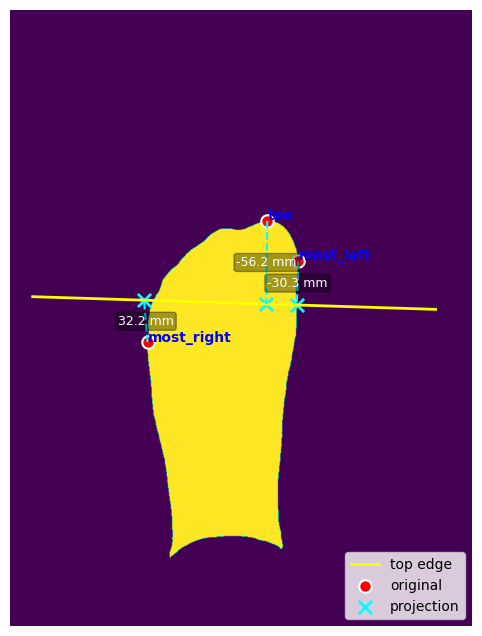

In [22]:
# After you computed `projs_img, projs_paper, dist_mm = project_points_to_top_edge(...)`
labels = ["toe", "most_left", "most_right"]
draw_points_and_projections(
    img=foot_mask,                 # or your original RGB image
    corners_img=corners_img,       # [TL, TR, BR, BL]
    points_img=points_f,           # Nx2 original points
    projs_img=projs_img,           # Nx2 projected points (in image coords)
    labels=labels,
    dist_mm=dist_mm                # optional; remove if not needed
)

In [23]:
# def pick_size_mm_for_top_edge(corners_img, base_size_mm=(215.9, 279.4)):
#     """
#     corners_img: [TL, TR, BR, BL] in pixels.
#     base_size_mm: (short, long) side, e.g. (215.9, 279.4) for Letter,
#                   (210, 297) for A4.
#     Returns (W, H) so that the TOP edge (TL->TR) maps to the LONGER mm side
#     if the top edge is longer in the image; otherwise to the shorter side.
#     """
#     corners = np.asarray(corners_img, float)
#     TL, TR, BR, BL = corners
#     top_len_px  = np.linalg.norm(TR - TL)
#     side_len_px = np.linalg.norm(BR - TR)

#     short_mm, long_mm = sorted(base_size_mm)
#     if top_len_px >= side_len_px:
#         # top edge looks longer in the image -> map to long side
#         return (long_mm, short_mm)
#     else:
#         # top edge looks shorter in the image -> map to short side
#         return (short_mm, long_mm)

In [24]:
# After you've already computed:
# projs_img, projs_paper, dist_mm = project_points_to_top_edge(...)
# and you have the labels in this order for your 3 points:
labels = ["toe", "most_left", "most_right"]

# Find indices
idx = {lbl: i for i, lbl in enumerate(labels)}
iL, iR = idx["most_left"], idx["most_right"]

# ---- Option A: real-world distance in millimeters (recommended) ----
# projs_paper holds coordinates in the rectified paper plane (mm), so the
# projections lie on y=0. Distance along the top edge is |Δx|:
xL, xR = projs_paper[iL, 0], projs_paper[iR, 0]
dist_edge_mm = float(abs(xR - xL))
print(f"Distance between projected 'most_left' and 'most_right' (mm): {dist_edge_mm:.2f}")

# ---- Option B: pixel distance in the original image (if you prefer pixels) ----
pL, pR = projs_img[iL], projs_img[iR]
dist_edge_px = float(np.linalg.norm(pR - pL))
print(f"Distance between projected points (pixels): {dist_edge_px:.2f}")

Distance between projected 'most_left' and 'most_right' (mm): 106.48
Distance between projected points (pixels): 1001.02


In [30]:
# Decide orientation automatically
size_mm = pick_size_mm_for_top_edge(corners_img, base_size_mm=(215.9, 279.4))  # Letter
projs_img, projs_paper, dist_mm = project_points_to_top_edge(
    corners_img, points_f, size_mm=size_mm,
    camera_matrix=None, dist_coeffs=None
)

In [31]:
dist_mm

array([    -56.202,     -30.283,      32.223], dtype=float32)

In [24]:



def foot_distance_mm(paper_corners, toe_pt, ankle_pt, paper_size_mm):
    """
    paper_corners: list/array of 4 (x,y) image points (any order) on the paper corners
    toe_pt, ankle_pt: (x,y) image points
    paper_size_mm: (width_mm, height_mm), e.g. A4=(210, 297), Letter=(215.9, 279.4)
    """
    W_mm, H_mm = paper_size_mm

    # 1) Order paper corners consistently
    src = order_corners(paper_corners)  # tl, tr, br, bl

    # 2) Target plane is a rectangle in MILLIMETERS
    dst = np.array([[0, 0],
                    [W_mm, 0],
                    [W_mm, H_mm],
                    [0, H_mm]], dtype=np.float32)

    # 3) Homography from image -> metric (mm) plane
    H, _ = cv2.findHomography(src, dst, method=0)

    # 4) Transform toe/ankle into metric plane (units: mm)
    pts = np.array([[toe_pt, ankle_pt]], dtype=np.float32)  # shape (1,2,2)
    pts_mm = cv2.perspectiveTransform(pts, H)[0]            # shape (2,2)

    toe_mm, ankle_mm = pts_mm[0], pts_mm[1]
    dist_mm = float(np.linalg.norm(toe_mm - ankle_mm))
    return dist_mm, toe_mm, ankle_mm


In [111]:
# ----------------- EXAMPLE USAGE -----------------

# Replace these with your actual detections (image pixel coordinates)
paper_corners = points

toe_pt   = toe_p
ankle_pt = ankle_p

# Choose paper size:
A4_MM      = (210.0, 297.0)
LETTER_MM  = (215.9, 279.4)  # 8.5 x 11 inches

dist_mm, toe_mm, ankle_mm = foot_distance_mm(
    paper_corners, toe_pt, ankle_pt, paper_size_mm=LETTER_MM  # or A4_MM
)

print(f"Toe–ankle distance: {dist_mm:.1f} mm ({dist_mm/10:.2f} cm)")

Toe–ankle distance: 270.9 mm (27.09 cm)


In [112]:
# Mondopoint (cm) reference to EU/US/UK - adults (approx.)
# MEN
MEN_TABLE = {
    24.5: {"EU": 39,   "US": 6.5, "UK": 6},
    25.0: {"EU": 40,   "US": 7.0, "UK": 6.5},
    25.5: {"EU": 40.5, "US": 7.5, "UK": 7},
    26.0: {"EU": 41,   "US": 8.0, "UK": 7.5},
    26.5: {"EU": 42,   "US": 8.5, "UK": 8},
    27.0: {"EU": 42.5, "US": 9.0, "UK": 8.5},
    27.5: {"EU": 43,   "US": 9.5, "UK": 9},
    28.0: {"EU": 44,   "US":10.0, "UK": 9.5},
    28.5: {"EU": 44.5, "US":10.5, "UK":10},
    29.0: {"EU": 45,   "US":11.0, "UK":10.5},
    29.5: {"EU": 46,   "US":11.5, "UK":11},
    30.0: {"EU": 46.5, "US":12.0, "UK":11.5},
}

# WOMEN
WOMEN_TABLE = {
    22.0: {"EU": 35,   "US": 5.0, "UK": 2.5},
    22.5: {"EU": 35.5, "US": 5.5, "UK": 3.0},
    23.0: {"EU": 36,   "US": 6.0, "UK": 3.5},
    23.5: {"EU": 37,   "US": 6.5, "UK": 4.0},
    24.0: {"EU": 37.5, "US": 7.0, "UK": 4.5},
    24.5: {"EU": 38,   "US": 7.5, "UK": 5.0},
    25.0: {"EU": 39,   "US": 8.0, "UK": 5.5},
    25.5: {"EU": 39.5, "US": 8.5, "UK": 6.0},
    26.0: {"EU": 40,   "US": 9.0, "UK": 6.5},
    26.5: {"EU": 41,   "US": 9.5, "UK": 7.0},
    27.0: {"EU": 42,   "US":10.0, "UK": 7.5},
}